## Aditya Sawant - CS 412 - Final Project

In [2308]:
#From the console, run the following
#pip install numpy
#pip install scipy
#pip install matplotlib
#pip install tensorflow
#pip install keras
#pip install librosa

#25th April 2020
#Aditya Sawant - 676810589
#CS 412

# Import required packages here (after they are installed)
import numpy as np

import matplotlib.pyplot as mp
from pylab import show
from tabulate import tabulate

import csv
import math
import time
import warnings
warnings.filterwarnings('ignore')

from IPython.core.debugger import set_trace
# Load data. csv file should be in the same folder as the notebook for this to work, otherwise
# give data path.
data = np.loadtxt("data.csv",delimiter = ',', skiprows = 1)

# Attempt for Keras

# Modified feature vector attempt

In [2249]:
import pandas as pd
import random
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.layers import LeakyReLU

In [2295]:
df = pd.read_csv("data-1-csv.csv")

display(df[0:3])

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,blues
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,blues
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,blues


In [2251]:
df.drop('beats', axis =1, inplace =True)
display(df[0:3])

,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,label
0,103.359375,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,blues
1,95.703125,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,blues
2,151.999081,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,blues


In [2252]:
# # Normalize for tempo, spectral_centroid, spectral_bandwidth and rolloff using min-max normalization

# to_normalize = ['tempo','spectral_centroid','spectral_bandwidth','rolloff']

# for f in to_normalize:
#     df[f] = (df[f]-df[f].min())/(df[f].max()-df[f].min())

In [2253]:
# Normalize for spectral_centroid, spectral_bandwidth and rolloff using mean normalization

to_normalize = ['tempo','spectral_centroid','spectral_bandwidth','rolloff']

for f in to_normalize:    
    df[f] = (df[f]-df[f].mean())/(df[f].std())
    
    
#Normalize tempo with min max normalization    
df['tempo'] = (df['tempo']-df['tempo'].min())/(df['tempo'].max()-df['tempo'].min())

In [2254]:
display(df[0:3])

,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,label
0,0.268889,0.380260,0.248262,-0.118570,-0.543280,-0.238507,0.127272,blues
1,0.226337,0.306451,0.113475,-1.460643,-1.415235,-1.525079,0.058613,blues
2,0.539216,0.253487,0.151571,-1.216211,-0.510920,-1.061443,0.042967,blues


In [2255]:
#separate feature and label columns

x_df = df.columns.drop('label')
y_df = df.columns.drop('tempo').drop('chroma_stft').drop('rmse').drop('spectral_centroid').drop('spectral_bandwidth').drop('rolloff').drop('zero_crossing_rate')

In [2256]:
x_features = df[x_df].values
one_encoded = pd.get_dummies(df['label'])
genres = one_encoded.columns
y_label = one_encoded.values

In [2257]:
print(genre_labels)


x_features = x_features.tolist()
y_label = y_label.tolist()

['disco', 'metal', 'pop', 'blues', 'rock', 'reggae', 'jazz', 'country', 'classical', 'hiphop']


In [2258]:
#Split data into training and testing


train_features = []
train_genres = []
test_features = []
test_genres = []

i = 0
start = 0
for f in x_features:
    if(i<70):
        train_features.append(f)
        train_genres.append(y_label[start])
    elif(70<=i<100):
        test_features.append(f)
        test_genres.append(y_label[start])
    i += 1
    start += 1
    if((len(train_genres)+len(test_genres)) % 100 == 0):
        i = 0

tuples = [(train_features[i],train_genres[i]) for i in range(len(train_features))]

random.shuffle(tuples)

for t in range(len(tuples)):
    train_features[t] = tuples[t][0]
    train_genres [t] = tuples[t][1]
    
        
        
train_features = np.array(train_features)
train_genres = np.array(train_genres)



test_features = np.array(test_features)
test_genres = np.array(test_genres)

print(len(train_features))
print(len(train_genres))
print(len(test_features))
print(len(test_features))

700
700
300
300


In [2259]:
print((train_features[1:3]))
print((train_genres[1:3]))

[[0.37830688 0.42433398 0.16233943 0.58052393 1.03555566 0.72933713
  0.10321517]
 [0.22633745 0.4982809  0.21798564 1.18906968 1.48683492 1.33086576
  0.12681972]]
[[0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]]


In [2260]:
# Valid model - 1 - good 42%
# model = Sequential()

# model.add(Dense(14, input_dim=7, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [2261]:
# Valid model - 2 - not so good 36%
# model = Sequential()

# model.add(Dense(14, input_dim=7, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# model.compile(loss = 'categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])

In [2262]:
# #Valid model - 3 - pretty good 45%
# model = Sequential()

# model.add(Dense(14, input_dim=7, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [2263]:
#  # Valid model - 4 - bad 11%
# model = Sequential()
# model.add(Dense(2, input_dim=7, activation='selu'))
# model.add(Dense(10, activation='softmax'))
# model.add(Dense(10, activation='relu'))

# model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [2264]:
#  # Valid model - 5 - pretty good 48%
# model = Sequential()
# model.add(Dense(10, input_dim=7, activation='relu'))
# model.add(Dense(10, activation='selu'))
# model.add(Dense(10, activation='softmax'))

# model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [2265]:
#  # Valid model - 6 - good 45% - training 30 - testing 70 
#  # Valid model - 6 - good 44% - training 50 - testing 50   
# model = Sequential()
# # model.add(Dense(10, input_dim=7, activation='leakyrelu'))
# model.add(Dense(10, input_dim=7))
# model.add(LeakyReLU(alpha=0.05))
# model.add(Dense(10, activation='softmax'))

# model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [2267]:
#   # Valid model - 7 - best yet - train acc 54% test acc 46% - 50/50 test/train
# model = Sequential()
# model.add(Dense(10, input_dim=7))
# model.add(LeakyReLU(alpha=0.05))
# model.add(Dense(10, activation='selu'))
# model.add(Dense(10, activation='softmax'))

# model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [2268]:
#   # Valid model - 8 - best yet - train acc 50% test acc 48% - 30/70 test/train  
# model = Sequential()
# model.add(Dense(10, input_dim=7))
# model.add(LeakyReLU(alpha=0.05))
# model.add(Dense(10))
# model.add(LeakyReLU(alpha=0.05))
# model.add(Dense(10, activation='softmax'))

# model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [2269]:
#   # Valid model - 9  - train acc 50% test acc 49% - 30/70 test/train
# model = Sequential()
# model.add(Dense(10, input_dim=7))
# model.add(LeakyReLU(alpha=0.1))
# model.add(Dense(10))
# model.add(LeakyReLU(alpha=0.05))
# model.add(Dense(10, activation='softmax'))

# model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [2270]:
# Valid model - FINAL - 10 - best yet - train acc 58% test acc 53% - 30/70 test/train--> good o/p, batch_size=100

model = Sequential()
model.add(Dense(10, input_dim=7))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(10, activation='selu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [2271]:
history = model.fit(train_features,train_genres, epochs=2000, batch_size=100)

Epoch 1/2000
700/700 [==============================] - 16s 22ms/step - loss: 2.2666 - accuracy: 0.2343
Epoch 2/2000
700/700 [==============================] - 1s 764us/step - loss: 2.2438 - accuracy: 0.2486
Epoch 3/2000
700/700 [==============================] - 1s 764us/step - loss: 2.2245 - accuracy: 0.2443
Epoch 4/2000
700/700 [==============================] - 1s 767us/step - loss: 2.2073 - accuracy: 0.2357
Epoch 5/2000
700/700 [==============================] - 1s 782us/step - loss: 2.1914 - accuracy: 0.2343
Epoch 6/2000
700/700 [==============================] - 1s 776us/step - loss: 2.1761 - accuracy: 0.2329
Epoch 7/2000
700/700 [==============================] - 1s 773us/step - loss: 2.1617 - accuracy: 0.2300
Epoch 8/2000
700/700 [==============================] - 1s 774us/step - loss: 2.1470 - accuracy: 0.2286
Epoch 9/2000
700/700 [==============================] - 1s 803us/step - loss: 2.1325 - accuracy: 0.2300
Epoch 10/2000
700/700 [==============================] - 1s 780u

700/700 [==============================] - 1s 767us/step - loss: 1.7154 - accuracy: 0.3586
Epoch 80/2000
700/700 [==============================] - 1s 792us/step - loss: 1.7133 - accuracy: 0.3571
Epoch 81/2000
700/700 [==============================] - 1s 763us/step - loss: 1.7121 - accuracy: 0.3557
Epoch 82/2000
700/700 [==============================] - 1s 773us/step - loss: 1.7104 - accuracy: 0.3557
Epoch 83/2000
700/700 [==============================] - 1s 773us/step - loss: 1.7088 - accuracy: 0.3600
Epoch 84/2000
700/700 [==============================] - 1s 776us/step - loss: 1.7073 - accuracy: 0.3614
Epoch 85/2000
700/700 [==============================] - 1s 774us/step - loss: 1.7060 - accuracy: 0.3586
Epoch 86/2000
700/700 [==============================] - 1s 772us/step - loss: 1.7041 - accuracy: 0.3614
Epoch 87/2000
700/700 [==============================] - 1s 772us/step - loss: 1.7028 - accuracy: 0.3614
Epoch 88/2000
700/700 [==============================] - 1s 765us/ste

700/700 [==============================] - 1s 782us/step - loss: 1.5235 - accuracy: 0.4414
Epoch 234/2000
700/700 [==============================] - 1s 769us/step - loss: 1.5228 - accuracy: 0.4457
Epoch 235/2000
700/700 [==============================] - 1s 770us/step - loss: 1.5205 - accuracy: 0.4486
Epoch 236/2000
700/700 [==============================] - 1s 765us/step - loss: 1.5199 - accuracy: 0.4500
Epoch 237/2000
700/700 [==============================] - 1s 766us/step - loss: 1.5175 - accuracy: 0.4500
Epoch 238/2000
700/700 [==============================] - 1s 770us/step - loss: 1.5159 - accuracy: 0.4486
Epoch 239/2000
700/700 [==============================] - 1s 765us/step - loss: 1.5148 - accuracy: 0.4457
Epoch 240/2000
700/700 [==============================] - 1s 765us/step - loss: 1.5134 - accuracy: 0.4486
Epoch 241/2000
700/700 [==============================] - 1s 766us/step - loss: 1.5125 - accuracy: 0.4486
Epoch 242/2000
700/700 [==============================] - 1s 

700/700 [==============================] - 1s 789us/step - loss: 1.3785 - accuracy: 0.4914
Epoch 388/2000
700/700 [==============================] - 1s 770us/step - loss: 1.3781 - accuracy: 0.4843
Epoch 389/2000
700/700 [==============================] - 1s 771us/step - loss: 1.3770 - accuracy: 0.4886
Epoch 390/2000
700/700 [==============================] - 1s 778us/step - loss: 1.3764 - accuracy: 0.4914
Epoch 391/2000
700/700 [==============================] - 1s 769us/step - loss: 1.3771 - accuracy: 0.4900
Epoch 392/2000
700/700 [==============================] - 1s 779us/step - loss: 1.3752 - accuracy: 0.4914
Epoch 393/2000
700/700 [==============================] - 1s 774us/step - loss: 1.3751 - accuracy: 0.4886
Epoch 394/2000
700/700 [==============================] - 1s 768us/step - loss: 1.3746 - accuracy: 0.4886
Epoch 395/2000
700/700 [==============================] - 1s 768us/step - loss: 1.3737 - accuracy: 0.4857
Epoch 396/2000
700/700 [==============================] - 1s 

700/700 [==============================] - 1s 762us/step - loss: 1.3107 - accuracy: 0.5214
Epoch 542/2000
700/700 [==============================] - 1s 768us/step - loss: 1.3110 - accuracy: 0.5214
Epoch 543/2000
700/700 [==============================] - 1s 770us/step - loss: 1.3091 - accuracy: 0.5186
Epoch 544/2000
700/700 [==============================] - 1s 776us/step - loss: 1.3095 - accuracy: 0.5200
Epoch 545/2000
700/700 [==============================] - 1s 778us/step - loss: 1.3090 - accuracy: 0.5214
Epoch 546/2000
700/700 [==============================] - 1s 829us/step - loss: 1.3091 - accuracy: 0.5157
Epoch 547/2000
700/700 [==============================] - 1s 763us/step - loss: 1.3086 - accuracy: 0.5129
Epoch 548/2000
700/700 [==============================] - 1s 785us/step - loss: 1.3086 - accuracy: 0.5186
Epoch 549/2000
700/700 [==============================] - 1s 813us/step - loss: 1.3083 - accuracy: 0.5157
Epoch 550/2000
700/700 [==============================] - 1s 

700/700 [==============================] - 1s 755us/step - loss: 1.2735 - accuracy: 0.5371
Epoch 696/2000
700/700 [==============================] - 1s 752us/step - loss: 1.2715 - accuracy: 0.5357
Epoch 697/2000
700/700 [==============================] - 1s 741us/step - loss: 1.2738 - accuracy: 0.5286
Epoch 698/2000
700/700 [==============================] - 1s 743us/step - loss: 1.2725 - accuracy: 0.5271
Epoch 699/2000
700/700 [==============================] - 1s 762us/step - loss: 1.2717 - accuracy: 0.5300
Epoch 700/2000
700/700 [==============================] - 1s 772us/step - loss: 1.2720 - accuracy: 0.5286
Epoch 701/2000
700/700 [==============================] - 1s 754us/step - loss: 1.2717 - accuracy: 0.5329
Epoch 702/2000
700/700 [==============================] - 1s 760us/step - loss: 1.2718 - accuracy: 0.5300
Epoch 703/2000
700/700 [==============================] - 1s 769us/step - loss: 1.2716 - accuracy: 0.5329
Epoch 704/2000
700/700 [==============================] - 1s 

700/700 [==============================] - 1s 797us/step - loss: 1.2461 - accuracy: 0.5357
Epoch 850/2000
700/700 [==============================] - 1s 792us/step - loss: 1.2458 - accuracy: 0.5371
Epoch 851/2000
700/700 [==============================] - 1s 979us/step - loss: 1.2459 - accuracy: 0.5457
Epoch 852/2000
700/700 [==============================] - 1s 821us/step - loss: 1.2462 - accuracy: 0.5443
Epoch 853/2000
700/700 [==============================] - 1s 1ms/step - loss: 1.2461 - accuracy: 0.5400
Epoch 854/2000
700/700 [==============================] - 1s 787us/step - loss: 1.2453 - accuracy: 0.5386
Epoch 855/2000
700/700 [==============================] - 1s 772us/step - loss: 1.2462 - accuracy: 0.5343
Epoch 856/2000
700/700 [==============================] - 1s 774us/step - loss: 1.2468 - accuracy: 0.5371
Epoch 857/2000
700/700 [==============================] - 1s 898us/step - loss: 1.2453 - accuracy: 0.5400
Epoch 858/2000
700/700 [==============================] - 1s 1m

700/700 [==============================] - 1s 776us/step - loss: 1.2259 - accuracy: 0.5486
Epoch 1004/2000
700/700 [==============================] - 1s 773us/step - loss: 1.2252 - accuracy: 0.5500
Epoch 1005/2000
700/700 [==============================] - 1s 774us/step - loss: 1.2251 - accuracy: 0.5514
Epoch 1006/2000
700/700 [==============================] - 1s 768us/step - loss: 1.2262 - accuracy: 0.5471
Epoch 1007/2000
700/700 [==============================] - 1s 781us/step - loss: 1.2249 - accuracy: 0.5514
Epoch 1008/2000
700/700 [==============================] - 1s 778us/step - loss: 1.2252 - accuracy: 0.5514
Epoch 1009/2000
700/700 [==============================] - 1s 819us/step - loss: 1.2247 - accuracy: 0.5486
Epoch 1010/2000
700/700 [==============================] - 1s 807us/step - loss: 1.2245 - accuracy: 0.5486
Epoch 1011/2000
700/700 [==============================] - 1s 790us/step - loss: 1.2247 - accuracy: 0.5514
Epoch 1012/2000
700/700 [============================

700/700 [==============================] - 1s 861us/step - loss: 1.2067 - accuracy: 0.5571
Epoch 1156/2000
700/700 [==============================] - 1s 777us/step - loss: 1.2072 - accuracy: 0.5586
Epoch 1157/2000
700/700 [==============================] - 1s 899us/step - loss: 1.2063 - accuracy: 0.5657
Epoch 1158/2000
700/700 [==============================] - 1s 897us/step - loss: 1.2059 - accuracy: 0.5614
Epoch 1159/2000
700/700 [==============================] - 1s 833us/step - loss: 1.2058 - accuracy: 0.5643
Epoch 1160/2000
700/700 [==============================] - 1s 901us/step - loss: 1.2060 - accuracy: 0.5586
Epoch 1161/2000
700/700 [==============================] - 1s 796us/step - loss: 1.2052 - accuracy: 0.5586
Epoch 1162/2000
700/700 [==============================] - 1s 800us/step - loss: 1.2062 - accuracy: 0.5643
Epoch 1163/2000
700/700 [==============================] - 1s 822us/step - loss: 1.2048 - accuracy: 0.5614
Epoch 1164/2000
700/700 [============================

700/700 [==============================] - 1s 783us/step - loss: 1.1910 - accuracy: 0.5671
Epoch 1308/2000
700/700 [==============================] - 1s 779us/step - loss: 1.1909 - accuracy: 0.5686
Epoch 1309/2000
700/700 [==============================] - 1s 772us/step - loss: 1.1905 - accuracy: 0.5729
Epoch 1310/2000
700/700 [==============================] - 1s 774us/step - loss: 1.1920 - accuracy: 0.5743
Epoch 1311/2000
700/700 [==============================] - 1s 780us/step - loss: 1.1907 - accuracy: 0.5757
Epoch 1312/2000
700/700 [==============================] - 1s 773us/step - loss: 1.1905 - accuracy: 0.5729
Epoch 1313/2000
700/700 [==============================] - 1s 777us/step - loss: 1.1913 - accuracy: 0.5700
Epoch 1314/2000
700/700 [==============================] - 1s 770us/step - loss: 1.1903 - accuracy: 0.5671
Epoch 1315/2000
700/700 [==============================] - 1s 768us/step - loss: 1.1918 - accuracy: 0.5714
Epoch 1316/2000
700/700 [============================

700/700 [==============================] - 1s 828us/step - loss: 1.1782 - accuracy: 0.5843
Epoch 1460/2000
700/700 [==============================] - 1s 821us/step - loss: 1.1780 - accuracy: 0.5814
Epoch 1461/2000
700/700 [==============================] - 1s 777us/step - loss: 1.1769 - accuracy: 0.5857
Epoch 1462/2000
700/700 [==============================] - 1s 873us/step - loss: 1.1774 - accuracy: 0.5800
Epoch 1463/2000
700/700 [==============================] - 1s 785us/step - loss: 1.1771 - accuracy: 0.5843
Epoch 1464/2000
700/700 [==============================] - 1s 779us/step - loss: 1.1769 - accuracy: 0.5871
Epoch 1465/2000
700/700 [==============================] - 1s 854us/step - loss: 1.1788 - accuracy: 0.5800
Epoch 1466/2000
700/700 [==============================] - 1s 809us/step - loss: 1.1766 - accuracy: 0.5771
Epoch 1467/2000
700/700 [==============================] - 1s 871us/step - loss: 1.1779 - accuracy: 0.5814
Epoch 1468/2000
700/700 [============================

700/700 [==============================] - 1s 762us/step - loss: 1.1668 - accuracy: 0.5857
Epoch 1612/2000
700/700 [==============================] - 1s 761us/step - loss: 1.1656 - accuracy: 0.5871
Epoch 1613/2000
700/700 [==============================] - 1s 772us/step - loss: 1.1660 - accuracy: 0.5800
Epoch 1614/2000
700/700 [==============================] - 1s 764us/step - loss: 1.1664 - accuracy: 0.5900
Epoch 1615/2000
700/700 [==============================] - 1s 770us/step - loss: 1.1658 - accuracy: 0.5829
Epoch 1616/2000
700/700 [==============================] - 1s 780us/step - loss: 1.1661 - accuracy: 0.5914
Epoch 1617/2000
700/700 [==============================] - 1s 768us/step - loss: 1.1662 - accuracy: 0.5886
Epoch 1618/2000
700/700 [==============================] - 1s 766us/step - loss: 1.1660 - accuracy: 0.5929
Epoch 1619/2000
700/700 [==============================] - 1s 785us/step - loss: 1.1654 - accuracy: 0.5957
Epoch 1620/2000
700/700 [============================

700/700 [==============================] - 1s 797us/step - loss: 1.1568 - accuracy: 0.5857
Epoch 1764/2000
700/700 [==============================] - 1s 801us/step - loss: 1.1567 - accuracy: 0.5929
Epoch 1765/2000
700/700 [==============================] - 1s 776us/step - loss: 1.1559 - accuracy: 0.5929
Epoch 1766/2000
700/700 [==============================] - 1s 779us/step - loss: 1.1554 - accuracy: 0.5857
Epoch 1767/2000
700/700 [==============================] - 1s 794us/step - loss: 1.1562 - accuracy: 0.5929
Epoch 1768/2000
700/700 [==============================] - 1s 774us/step - loss: 1.1559 - accuracy: 0.5900
Epoch 1769/2000
700/700 [==============================] - 1s 804us/step - loss: 1.1557 - accuracy: 0.5943
Epoch 1770/2000
700/700 [==============================] - 1s 796us/step - loss: 1.1550 - accuracy: 0.5943
Epoch 1771/2000
700/700 [==============================] - 1s 786us/step - loss: 1.1557 - accuracy: 0.5929
Epoch 1772/2000
700/700 [============================

700/700 [==============================] - 1s 777us/step - loss: 1.1474 - accuracy: 0.5886
Epoch 1916/2000
700/700 [==============================] - 1s 784us/step - loss: 1.1463 - accuracy: 0.5886
Epoch 1917/2000
700/700 [==============================] - 1s 776us/step - loss: 1.1460 - accuracy: 0.5857
Epoch 1918/2000
700/700 [==============================] - 1s 772us/step - loss: 1.1465 - accuracy: 0.5900
Epoch 1919/2000
700/700 [==============================] - 1s 779us/step - loss: 1.1469 - accuracy: 0.5871
Epoch 1920/2000
700/700 [==============================] - 1s 770us/step - loss: 1.1452 - accuracy: 0.5871
Epoch 1921/2000
700/700 [==============================] - 1s 778us/step - loss: 1.1470 - accuracy: 0.5800
Epoch 1922/2000
700/700 [==============================] - 1s 776us/step - loss: 1.1455 - accuracy: 0.5857
Epoch 1923/2000
700/700 [==============================] - 1s 780us/step - loss: 1.1476 - accuracy: 0.5943
Epoch 1924/2000
700/700 [============================

In [2272]:
score = model.evaluate(test_features,test_genres)

300/300 [==============================] - 17s 56ms/step


In [2273]:
score

[1.3232116715113322, 0.5333333611488342]

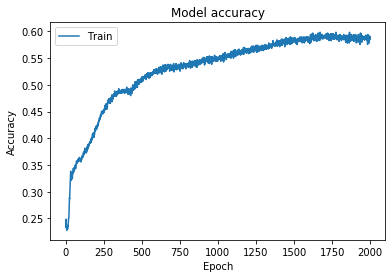

In [2290]:
# Plot training & validation accuracy values
mp.plot(history.history['accuracy'])
mp.title('Model accuracy')
mp.ylabel('Accuracy')
mp.xlabel('Epoch')
mp.legend(['Train', 'Test'], loc='upper left')
mp.show()

In [2275]:
np.set_printoptions(suppress=True),

(None,)

In [2276]:
ans = model.predict(test_features[100:101])
print(ans)
print("\n total p =",np.sum(ans))

[[0.28573593 0.00001914 0.04485557 0.31313932 0.02904978 0.02510367
  0.01421004 0.00030775 0.07123837 0.21634041]]

 total p = 1.0


In [2277]:
test_genres[100:101]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [2278]:
ans = model.predict(test_features[10:11])
print(ans)
print("\n total p =",np.sum(ans))

[[0.68583816 0.01442198 0.07988693 0.00109436 0.00038858 0.2105968
  0.00001097 0.00000101 0.000497   0.00726427]]

 total p = 1.0000001


In [2279]:
test_genres[10:11]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [2280]:
ans = model.predict(test_features[250:251])
print(ans)
print("\n total p =",np.sum(ans))

[[0.00254609 0.00008591 0.09511969 0.05268969 0.10211675 0.03376672
  0.0002634  0.07224607 0.49766544 0.1435002 ]]

 total p = 1.0


In [2281]:
test_genres[250:251]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [2282]:
pred = model.predict(test_features[0:298])

In [2283]:
test_genres[250:251]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [2284]:
ans

array([[0.00254609, 0.00008591, 0.09511969, 0.05268969, 0.10211675,
        0.03376672, 0.0002634 , 0.07224607, 0.49766544, 0.1435002 ]],
      dtype=float32)

In [2285]:
ind = (np.argpartition(ans[0], len(ans[0]) - 5)[-5:])

In [2286]:
ind

array([7, 2, 4, 8, 9])

In [2287]:
ans

array([[0.00254609, 0.00008591, 0.09511969, 0.05268969, 0.10211675,
        0.03376672, 0.0002634 , 0.07224607, 0.49766544, 0.1435002 ]],
      dtype=float32)

In [2288]:
for k in (range(1,10)):
        incorrect = 0
        for i in (range(0,299)):
            ans = model.predict(test_features[i:i+1])
            if((np.where(test_genres[i:i+1]==1)) not in (np.argpartition(ans[0], len(ans[0]) - k)[-k:])):
                incorrect += 1
#                 if(k == 7):
#                     print(ans)
#                     print(test_genres[i:i+1])
        h_loss = incorrect/len(test_features)
        print("Hamming loss for k =",k,"is",h_loss,"\t",incorrect,"/",len(test_features))

Hamming loss for k = 1 is 0.3933333333333333 	 118 / 300
Hamming loss for k = 2 is 0.22666666666666666 	 68 / 300
Hamming loss for k = 3 is 0.12 	 36 / 300
Hamming loss for k = 4 is 0.043333333333333335 	 13 / 300
Hamming loss for k = 5 is 0.016666666666666666 	 5 / 300
Hamming loss for k = 6 is 0.016666666666666666 	 5 / 300
Hamming loss for k = 7 is 0.0033333333333333335 	 1 / 300
Hamming loss for k = 8 is 0.0 	 0 / 300
Hamming loss for k = 9 is 0.0 	 0 / 300
